# **1. Perkenalan Dataset**

Dataset ini disusun untuk memprediksi tanaman yang paling cocok untuk ditanam berdasarkan beberapa parameter agroklimat (ilmu yang mempelajari hubungan antara kondisi iklim dan kegiatan pertanian). Data ini biasanya digunakan dalam aplikasi pertanian yang presisi dan pembelajaran mesin yang ditujukan untuk mendukung petani, penasihat pertanian, dan pembuat kebijakan.

Dataset ini terdiri dari 8 kolom dengan 2200 entri baris dengan komposisi sebagai berikut.

Fitur (Input):
- N: Kandungan nitrogen dalam tanah (mg/kg)
- P: Kandungan fosfor dalam tanah (mg/kg)
- K: Kandungan kalium dalam tanah (mg/kg)
- temperature: Suhu rata-rata (°C)
- humidity: Kelembaban relatif rata-rata (%)
- ph: Nilai pH tanah
- rainfall: Curah hujan (mm)

Label (Output):
- label: Tanaman yang paling sesuai dengan kondisi tertentu (misalnya, padi, jagung, kapas, dll.)

Sumber Dataset: https://www.kaggle.com/datasets/madhuraatmarambhagat/crop-recommendation-dataset

# **2. Import Library**

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import kagglehub
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

In [159]:
# Download dataset dari Kaggle (otomatis simpan ke cache)
path = kagglehub.dataset_download("madhuraatmarambhagat/crop-recommendation-dataset")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/crop-recommendation-dataset


In [160]:
# Path utama dataset
df_path = "/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv"
df = pd.read_csv(df_path)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [162]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


**Insight**:
- Kandungan Nitrogen (N) pada tanah bervariasi mulai dari 0 mm/kg sampai dengan 140 mm/kg dengan rata-rata 50.55 mm/kg.
- Rata-rata kandungan Fosfor (P) pada tanah adalah 53.36 mm/kg dengan nilai minimum 5 mm/kg dan maksimum 145 mm/kg.
- Kandungan Kalium (K) pada tanah bervariasi mulai dari 5 mm/kg sampai dengan 205 mm/kg dengan rata-rata 48.15 mm/kg.
- Temperatur/suhu rata-rata adalah 25.62°C dengan rentang 8.83°C - 43.68°C.
- Tingkat kelembapan (*humidity*) berada pada rentang 14.26% - 99.98% dengan rata-rata 71.48%.
- Kadar pH bervariasi antara 3.5 - 9.94 dengan rata-rata 6.47.
- Rata-rata curah hujan (*rainfall*) adalah 103.46 mm dengan rentang 20.21 mm - 298.56mm.


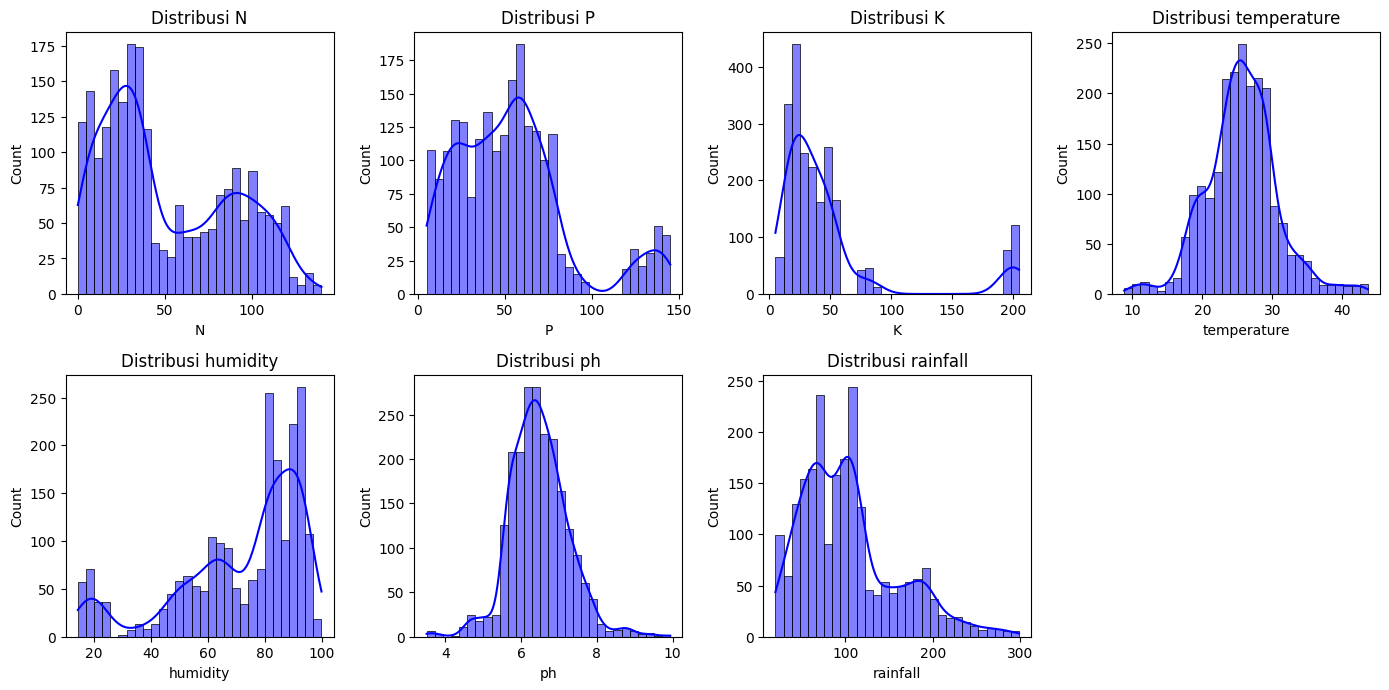

In [163]:
# Distribusi fitur numerik
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

**Insight**:
1. Nitrogen (N)

  Distribusinya bimodal (dua puncak), menunjukkan dua kelompok tanah dengan kandungan nitrogen berbeda. Banyak nilai N berada di rentang 0-100 mg/kg, dengan puncak utama di sekitar 20-40. Artinya, sebagian besar lahan memiliki kandungan nitrogen rendah-sedang.

2. Phosphor (P)

  Distribusi tampak multimodal dengan puncak utama sekitar 20-50 mg/kg. Ada beberapa *outlier* tinggi (>100), yang bisa mencerminkan area tertentu yang mendapat fosfor tinggi yang mungkin dari pupuk. Mayoritas data berada pada level rendah-menengah.

3. Kalium (K)

  Distribusinya *right-skewed* (miring ke kanan), artinya mayoritas tanah memiliki kadar K rendah. Sebagian besar data berada <50 mg/kg, tapi ada *outlier* ekstrem hingga mendekati 200+ mg/kg. Ini menunjukkan variasi besar antar wilayah yang beberapa mungkin sangat kaya kalium.

4. Temperature
  
  Distribusinya mendekati normal (Gaussian), puncaknya di sekitar 25-30°C. Sangat cocok untuk tanaman tropis, menunjukkan area pertanian berada di iklim tropis-subtropis. Hampir tidak ada suhu ekstrem, jadi bisa dibilang stabil.

5. Humidity
  
  Distribusinya juga bimodal dan banyak data di sekitar 60% dan 90% kelembapan.Hal ini bisa menunjukkan perbedaan musim (kering vs hujan) atau lokasi geografis (tinggi vs rendah). Tanaman dengan preferensi kelembaban tinggi akan lebih cocok di area ini.

6. pH
  
  Distribusinya mendekati normal, rata-rata sekitar 6.5. Hampir tidak ada pH ekstrem (<4 atau >9), menandakan tanah relatif netral hingga sedikit asam.

7. Rainfall
  
  Distribusinya *right-skewed*, kebanyakan data antara 50-150 mm, tapi ada *outlier* hingga hampir 300 mm. Artinya sebagian besar area memiliki curah hujan sedang, tapi beberapa area bisa sangat basah.

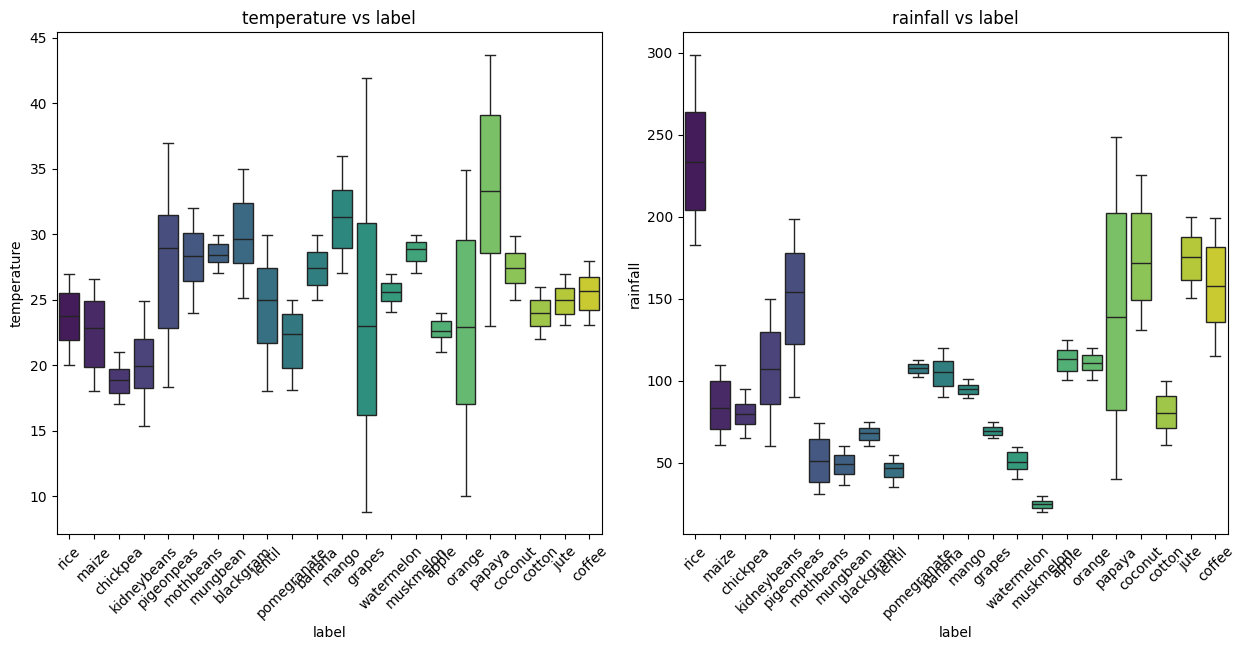

In [164]:
# Menganalisis hubungan antara fitur dan variabel target
plt.figure(figsize=(25, 18))

values = ['temperature','rainfall']

for i, column in enumerate(values, 1):
  if column != 'label':
    plt.subplot(3, 4, i)
    sns.boxplot(x='label', y=column, data=df, palette='viridis')
    plt.xticks(rotation=45)
    plt.title(f'{column} vs label')

plt.tight_layout()
plt.show()

**Temperature vs Label Insight**:
- Tanaman seperti grapes dan orange memiliki rentang suhu yang sangat lebar, menunjukkan mereka adaptif terhadap iklim.
- Tanaman seperti chickpea dan pomegranate membutuhkan suhu lebih rendah, cocok di daerah dengan iklim lebih sejuk.
- Rice dan maize relatif netral, bisa tumbuh baik di suhu sedang.

**Rainfall vs Label Insight**:
- Rice butuh curah hujan sangat tinggi, cocok di lahan basah atau sawah.
- Tanaman seperti muskmelon, mothbeans sangat cocok untuk daerah kering (hujan <100 mm).
- Coffee dan coconut butuh curah hujan sedang-tinggi, cocok di daerah tropis lembap.
- Papaya memiliki rentang curah hujan yang sangat lebar, menunjukkan tanaman ini adaptif terhadap curah hujan.

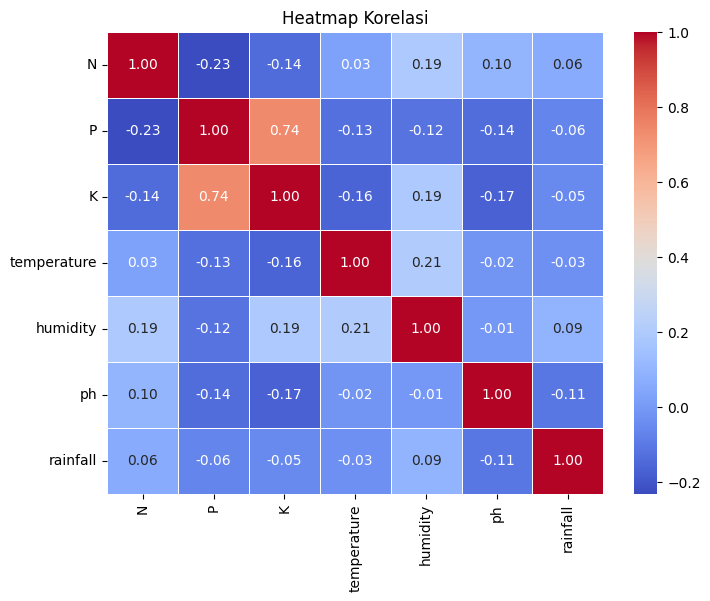

In [165]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(8, 6))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

**Insight**:
- P dan K: 0.74 → Korelasi positif kuat

  Kandungan fosfor (P) dan kalium (K) cenderung meningkat bersama. Bisa jadi keduanya berasal dari sumber pemupukan yang sama atau kondisi tanah yang mirip.

- Korelasi Rendah / Lemah (|r| < 0.2):
  Fitur-fitur berikut memiliki hubungan yang sangat lemah atau hampir tidak ada: N vs lainnya (kecuali P dan K), temperature vs lainnya, humidity vs lainnya, rainfall vs lainnya, ph vs lainnya.
  
  Interpretasi:
  - Tidak ada multikolinearitas parah (fitur saling bebas).
  - Setiap fitur membawa informasi unik dan dapat berguna dalam pemodelan klasifikasi tanpa risiko informasi berulang.
  - Fitur cuaca (temperature, humidity, rainfall) tidak tergantung langsung pada unsur hara tanah (N, P, K) yang berarti mendukung validitas variabel sebagai input.



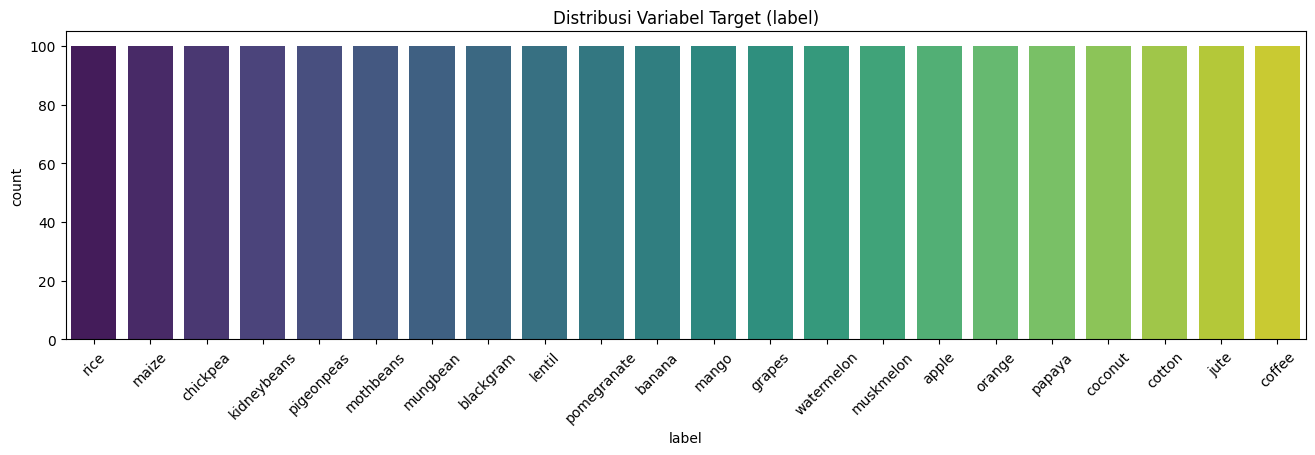

In [166]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(16, 4))
sns.countplot(x='label', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribusi Variabel Target (label)')
plt.show()

Distribusi jumlah data per jenis tanaman seimbang.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Berikut adalah tahapan-tahapan yang bisa dilakukan.
1. Menghapus atau Menangani Data Kosong (*Missing Values*)
2. Menghapus Data Duplikat
3. Deteksi dan Penanganan *Outlier*
4. *Encoding* Data Kategorikal

#### 1. Menghapus atau Menangani Data Kosong (*Missing Values*)

In [167]:
# Cek missing values
print("\nMissing values per fitur:")
print(df.isnull().sum())


Missing values per fitur:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


Data tidak memiliki nilai null (*missing values*).

#### 2. Menghapus Data Duplikat

In [168]:
# Cek data duplikat
print("Number of duplicates: ", df.duplicated().sum())

Number of duplicates:  0


Tidak ditemukan adanya duplikasi data

#### 3. Deteksi dan Penanganan *Outlier*

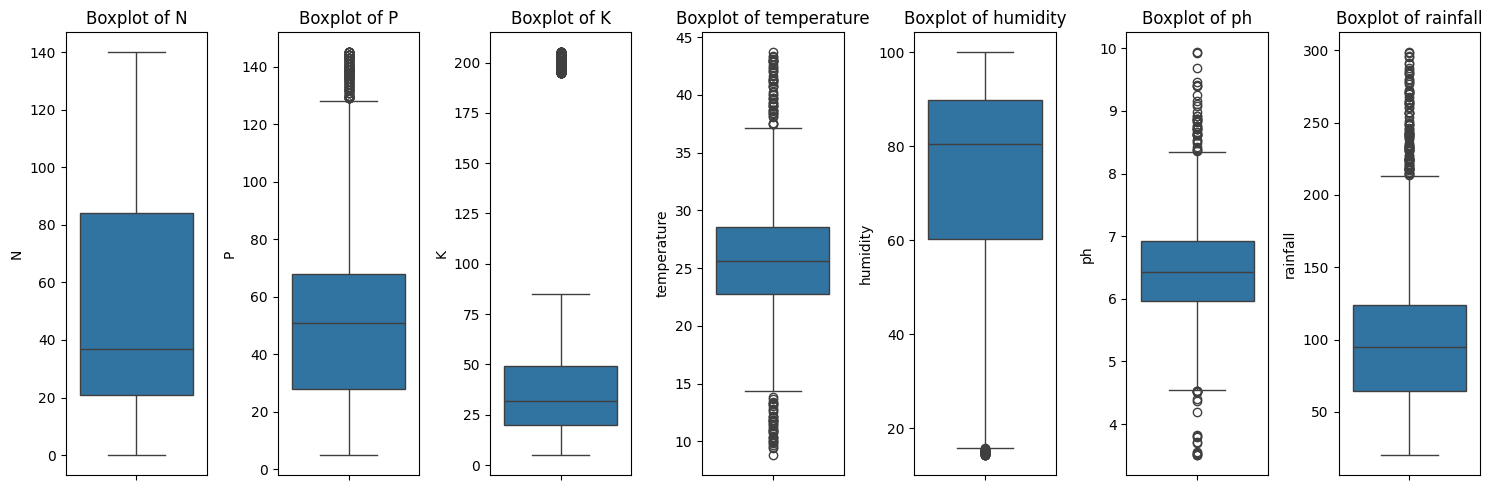

In [169]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
fig, axes = plt.subplots(1, len(numerical_columns), figsize=(15, 5))

for i, column in enumerate(numerical_columns):
    sns.boxplot(data=df, y=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

In [170]:
columns = ['N','P','K','humidity','rainfall']

def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"{column} - Outlier di bawah {lower_bound:.2f}, di atas {upper_bound:.2f}")

    # Capping: ganti nilai outlier dengan batas bawah/atas
    df[column] = df[column].apply(
        lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
    )

    return df

for col in columns:
    df = handle_outliers_iqr(df, col)

N - Outlier di bawah -73.88, di atas 179.12
P - Outlier di bawah -32.00, di atas 128.00
K - Outlier di bawah -23.50, di atas 92.50
humidity - Outlier di bawah 15.73, di atas 134.48
rainfall - Outlier di bawah -25.02, di atas 213.84


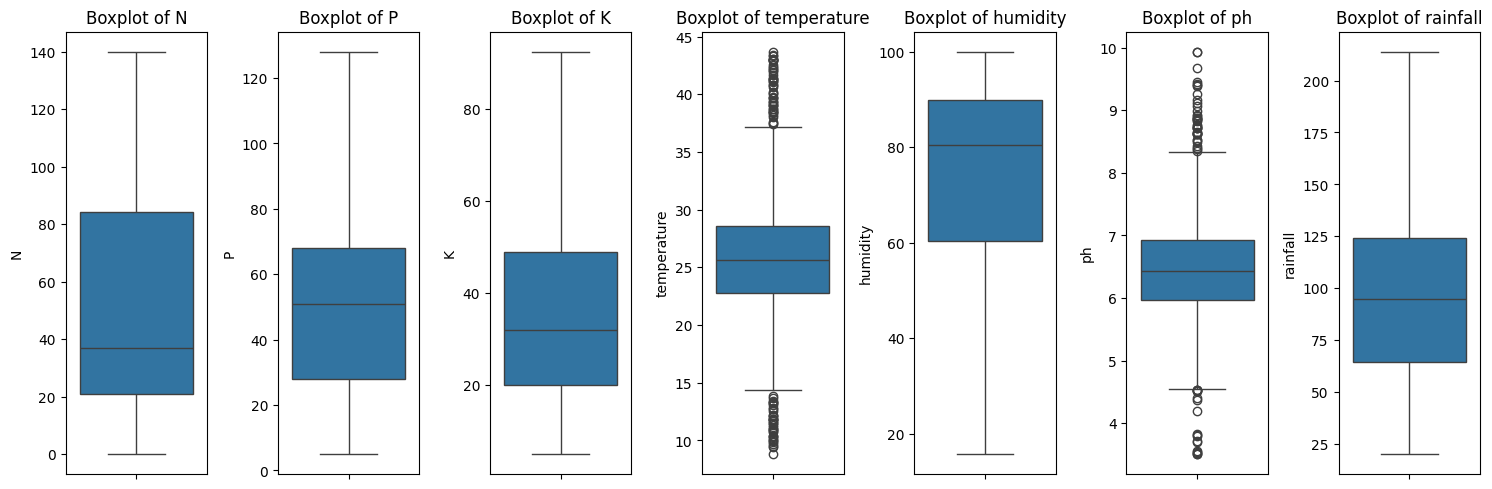

In [171]:
fig, axes = plt.subplots(1, len(numerical_columns), figsize=(15, 5))

for i, column in enumerate(numerical_columns):
    sns.boxplot(data=df, y=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

#### 4. *Encoding* Data Kategorikal

In [172]:
le = LabelEncoder()
df['encoded_label'] = le.fit_transform(df['label'])

In [173]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping label ke angka:")
print(label_mapping)

Mapping label ke angka:
{'apple': np.int64(0), 'banana': np.int64(1), 'blackgram': np.int64(2), 'chickpea': np.int64(3), 'coconut': np.int64(4), 'coffee': np.int64(5), 'cotton': np.int64(6), 'grapes': np.int64(7), 'jute': np.int64(8), 'kidneybeans': np.int64(9), 'lentil': np.int64(10), 'maize': np.int64(11), 'mango': np.int64(12), 'mothbeans': np.int64(13), 'mungbean': np.int64(14), 'muskmelon': np.int64(15), 'orange': np.int64(16), 'papaya': np.int64(17), 'pigeonpeas': np.int64(18), 'pomegranate': np.int64(19), 'rice': np.int64(20), 'watermelon': np.int64(21)}


In [174]:
# Hapus kolom label yang tidak di encoding
df = df.drop('label', axis=1)

### **Splitting Data**

In [175]:
X = df.drop('encoded_label', axis=1)
y = df['encoded_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [182]:
# Simpan ke file CSV
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)